# KNN_diabetes_prediction

-Prima Indians Diabetes Dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split

### Read dataset

In [2]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Examine shape of the dataset

In [3]:
diabetes_df.shape

(768, 9)

### Examine class distribution

In [4]:
diabetes_df.Outcome.value_counts()/len(diabetes_df)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

### Create the training set array and the testing set


In [5]:
# create the array to store features values and the target variable
X= diabetes_df.drop('Outcome', axis=1).values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [6]:
y=diabetes_df.Outcome.values

# Apply standard scaling to Scale the data- 

- K-NN is very sensitive to scaling the data

In [7]:
import sklearn.preprocessing as preproc
X_scaled = preproc.StandardScaler().fit_transform(X)
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

# Train/Test/Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42, stratify=y)

# KNN classifier
- apply different values of K to find the neighborhood size that provides the best performance or yields the smallest error rate
- 50 different values of K(1-50)

In [11]:
#import the KNN classifier
from sklearn.neighbors import KNeighborsClassifier

#create empty arrays to store the test accuracy and train accuracy
k=np.arange(1,50)
train_accuracy = np.empty(len(k))
test_accuracy = np.empty(len(k))

for i, k in enumerate(k):
    # instantiate the classifier
    knn=KNeighborsClassifier(n_neighbors=k)
    #fit the KNN model
    knn.fit(X_train, y_train)
    
    #evaluate train performance
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #evaluate test performance
    test_accuracy[i] = knn.score(X_test, y_test)


# Visualize the results of the score

<function matplotlib.pyplot.show(*args, **kw)>

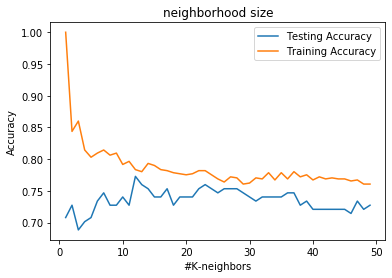

In [13]:
# Visualize Trai/Test Performance
k=np.arange(1,50)
plt.title('neighborhood size')
plt.plot(k,test_accuracy, label='Testing Accuracy')
plt.plot(k, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('#K-neighbors')
plt.ylabel('Accuracy')
plt.show

# Grid Search

- Apply grid search with cross validation in order to distinguish which is the best neighborhoodsize
- Try different values of K
- train/fit them all separately
- evaluate each of their performance
- select the best score

In [15]:
from sklearn.model_selection import GridSearchCV

# the grid parameters to be tunes is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_scaled, y)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

### Examine the best score 

In [16]:
knn_cv.best_score_

0.7669270833333334

### Examine the best k value

In [17]:
knn_cv.best_params_

{'n_neighbors': 17}